<a href="https://colab.research.google.com/github/janorena/analitica-de-datos/blob/master/base_de_datos_ataque_cardiaco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#cargar datos desde drive acceso libre
FILEID = "1K73mni1gZXVctsNPGEGI00TAYdYZ5sb9"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O codigos.zip && rm -rf /tmp/cookies.txt
!unzip codigos.zip
!dir

--2020-10-19 22:35:55--  https://docs.google.com/uc?export=download&confirm=&id=1K73mni1gZXVctsNPGEGI00TAYdYZ5sb9
Resolving docs.google.com (docs.google.com)... 172.217.214.101, 172.217.214.113, 172.217.214.100, ...
Connecting to docs.google.com (docs.google.com)|172.217.214.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0o-50-docs.googleusercontent.com/docs/securesc/b5ggu0hko2qltb4fn0o6dsad1miavbpl/3ndp6g9hic49uuouc0cnvr52fn02thdf/1603146900000/12793268178827524168/13827523173996150327Z/1K73mni1gZXVctsNPGEGI00TAYdYZ5sb9?e=download [following]
--2020-10-19 22:35:56--  https://doc-0o-50-docs.googleusercontent.com/docs/securesc/b5ggu0hko2qltb4fn0o6dsad1miavbpl/3ndp6g9hic49uuouc0cnvr52fn02thdf/1603146900000/12793268178827524168/13827523173996150327Z/1K73mni1gZXVctsNPGEGI00TAYdYZ5sb9?e=download
Resolving doc-0o-50-docs.googleusercontent.com (doc-0o-50-docs.googleusercontent.com)... 172.217.214.132, 2607:f8b0:4001:c05::84
Connectin

In [2]:
#Paso 1: Lectura
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

import plotly.figure_factory as ff
import plotly.express as px
import plotly.graph_objs as go

from sklearn.impute import SimpleImputer 
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score, cross_val_predict
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline


#crear carpeta con resultados
import os
try:
  os.mkdir('results')
except:
  print("Carpeta results ya existe")



import pandas as pd
%matplotlib inline
csv_path = 'heart_failure_clinical_records_dataset.csv'

Xdata = pd.read_csv(csv_path)

col_drop = ['time' ]
Xdata.drop(columns = col_drop, inplace = True)
Xdata.head(15)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,1


###Sex - Male = 1, Female =0
###Age - Age of patient
###Diabetes - 0 = No, 1 = Yes
###Anaemia - 0 = No, 1 = Yes
###High blood pressure - 0 = No, 1 = Yes
###Smoking - 0 = No, 1 = Yes
###DEATH EVENT - 0 = No, 1 = Yes

In [3]:
Xdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(9)
memory usage: 28.2 KB




*   Dado que el tipo de dato no es categorico no es necesario decodificar el tipo de variable.
* Es necesario hacer el entrenamiento y la validacion.



**Preproceso variable median_income -> continua a categórica**

# Datos del evento de interes

In [4]:
Xdata["DEATH_EVENT"].describe() # estadística básica de las variable de interés

count    299.00000
mean       0.32107
std        0.46767
min        0.00000
25%        0.00000
50%        0.00000
75%        1.00000
max        1.00000
Name: DEATH_EVENT, dtype: float64

# Paso 2: Particion entrenamiento y validacion


In [5]:
# Tamaño Xtrain 70%, Tamaño Xtest 30%
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
Xtrain, Xtest = train_test_split(Xdata,test_size=0.3)
col_DEATH = "DEATH_EVENT"
ytrain = Xtrain[col_DEATH]
ytest = Xtest[col_DEATH]
Xtrain.drop(columns=col_DEATH,inplace=True)
Xtest.drop(columns=col_DEATH,inplace=True)


In [6]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="most_frequent")
ytrain = imputer.fit_transform(pd.DataFrame(ytrain))
ytrain = ytrain.reshape(-1)

ytest = imputer.transform(pd.DataFrame(ytest))
ytest = ytest.reshape(-1)

print(ytrain.shape, ytest.shape)

(209,) (90,)


# Preparar datos (validación y análisis exploratorio por visualización)

In [7]:
# Entrenamiento
# DEATH EVENT -> 0 = No, 1 = Yes
ytrain[:20]

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0])

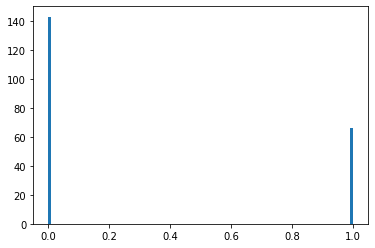

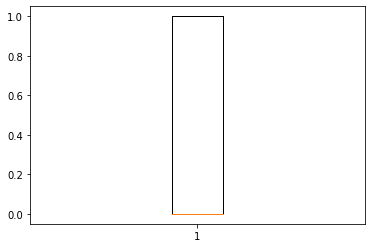

In [89]:
import matplotlib.pyplot as plt
plt.hist(ytrain,bins = 100)
plt.show()

plt.boxplot(ytrain)
plt.savefig('results/out_train.pdf', format='pdf', dpi=300)
plt.show()

* Se definirian las columnas para decodificar. Dado que en la base de datos no es necesario decodificar los datos, se deja como esta.
* En esta base de datos ya sta pre procesada por ende, no se crea la clase para la misma ya que seria redundante hacerle esto a la base de datos.

# (probabilidad descriptiva grafica)

## ¿Es la edad y el tabaco un indicador del evento de muerte?

## Analisis de supervivencia segun el genero



In [9]:
male = Xdata[Xdata["sex"]==1]
female = Xdata[Xdata["sex"]==0]

male_survi = male[Xdata["DEATH_EVENT"]==0]
male_not = male[Xdata["DEATH_EVENT"]==1]
female_survi = female[Xdata["DEATH_EVENT"]==0]
female_not = female[Xdata["DEATH_EVENT"]==1]

labels = ['Male - Survived','Male - Not Survived', "Female -  Survived", "Female - Not Survived"]
values = [len(male[Xdata["DEATH_EVENT"]==0]),len(male[Xdata["DEATH_EVENT"]==1]),
         len(female[Xdata["DEATH_EVENT"]==0]),len(female[Xdata["DEATH_EVENT"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on Survival - Gender")
plt.savefig('results/Analysis_on_Survival.pdf', format='pdf', dpi=300)
fig.show()

<Figure size 432x288 with 0 Axes>

* segun los resultados del analisis anterior, se puede notar la relacion con respecto a los hombres y mujeres que mueren o sobreviven. 

## Análisis factorial de género segun su mortandad

In [10]:
surv = Xdata[Xdata["DEATH_EVENT"]==0]["age"]
not_surv = Xdata[Xdata["DEATH_EVENT"]==1]["age"]
hist_data = [surv,not_surv]
group_labels = ['Survived', 'Not Survived']
fig = ff.create_distplot(hist_data, group_labels, bin_size=0.9)
fig.update_layout(
    title_text="Análisis en edad sobre estado de supervivencia")
plt.savefig('results/Analysis_on_Survival.pdf', format='pdf', dpi=300)
fig.show()

<Figure size 432x288 with 0 Axes>

* La supervivencia es alta de 45 a 75
* La propagación de la no supervivencia está pasando por todas las edades.

#### Edad vs mortandad

In [11]:
fig = px.violin(Xdata, y="age", x="DEATH_EVENT", color="DEATH_EVENT", box=True, points="all", hover_data=Xdata.columns)
fig.update_layout(title_text="Análisis en edad y género sobre el estado de supervivencia")
plt.savefig('results/Analysis_of_sex_and_DEATH_EVENT.pdf', format='pdf', dpi=300)
fig.show()

<Figure size 432x288 with 0 Axes>

Informe de edad
* La propagación de la supervivencia es alta en edades de 40 a 70
* La supervivencia es alta tanto para hombres de 50 a 60 años como para mujeres de 60 a 70 años respectivamente.

In [12]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder

# PREDICCION DE VARIABLES DE INTERES

In [13]:
Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209 entries, 124 to 12
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       209 non-null    float64
 1   anaemia                   209 non-null    int64  
 2   creatinine_phosphokinase  209 non-null    int64  
 3   diabetes                  209 non-null    int64  
 4   ejection_fraction         209 non-null    int64  
 5   high_blood_pressure       209 non-null    int64  
 6   platelets                 209 non-null    float64
 7   serum_creatinine          209 non-null    float64
 8   serum_sodium              209 non-null    int64  
 9   sex                       209 non-null    int64  
 10  smoking                   209 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 19.6 KB


In [14]:
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
sca = StandardScaler()
Xtrain_pre_z = sca.fit_transform(Xtrain)

In [15]:
Xtrain_pre_z.var(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [16]:
Xtrain.var(axis=0)

age                         1.373271e+02
anaemia                     2.424549e-01
creatinine_phosphokinase    7.748344e+05
diabetes                    2.441572e-01
ejection_fraction           1.305334e+02
high_blood_pressure         2.325175e-01
platelets                   1.021874e+10
serum_creatinine            6.754061e-01
serum_sodium                1.870109e+01
sex                         2.238222e-01
smoking                     2.283769e-01
dtype: float64

In [17]:
red = PCA()
zz = red.fit_transform(Xtrain_pre_z)

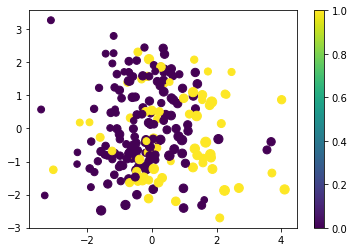

In [18]:
plt.scatter(zz[:,0],zz[:,1],c=ytrain,s = 100*Xtrain['age']/(Xtrain['age'].max()))
plt.colorbar()
plt.savefig('results/Xtrain.pdf', format='pdf', dpi=300)
plt.show()

* 

In [19]:
# proceso con test
Xtest['age']

140    80.0
69     65.0
269    40.0
127    58.0
261    62.0
       ... 
76     70.0
93     60.0
166    53.0
196    45.0
9      80.0
Name: age, Length: 90, dtype: float64

In [20]:
Xtest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 140 to 9
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       90 non-null     float64
 1   anaemia                   90 non-null     int64  
 2   creatinine_phosphokinase  90 non-null     int64  
 3   diabetes                  90 non-null     int64  
 4   ejection_fraction         90 non-null     int64  
 5   high_blood_pressure       90 non-null     int64  
 6   platelets                 90 non-null     float64
 7   serum_creatinine          90 non-null     float64
 8   serum_sodium              90 non-null     int64  
 9   sex                       90 non-null     int64  
 10  smoking                   90 non-null     int64  
dtypes: float64(3), int64(8)
memory usage: 8.4 KB


In [21]:
zztest = red.transform(sca.transform(Xtest)) # una sola linea

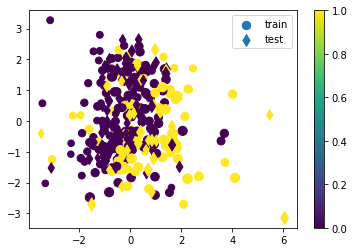

In [22]:
plt.scatter(zz[:,0],zz[:,1],c=ytrain,s = 100*Xtrain['age']/(Xtrain['age'].max()),label='train')
plt.colorbar()
plt.scatter(zztest[:,0],zztest[:,1],c=ytest,s=100*Xtest['age']/Xtest['age'].max(),marker='d',label='test')
plt.legend()
plt.savefig('results/Xtest.pdf', format='pdf', dpi=300)
plt.show()

# Definir modelos de predicción

---
### Se añaden los modelos de prediccion :


* KernelRidge
* Ridge
* Lasso




In [50]:
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.kernel_ridge import KernelRidge

steps = [
         [('scaler', StandardScaler()), #estandarizar cada atributo columna de xtrain centrada en 0 y var = 1
          ('reg', LinearRegression())],
         
         [('scaler',StandardScaler()),
          ('reg',ElasticNet())],
         
         [('scaler', StandardScaler()), #estandarizar cada atriuto columna de xtrain centrada en 0 y var = 1
          ('reg',  KernelRidge(alpha=1, gamma=None ))], #clasificador kernel = 'rbf'
         
         [('scaler', StandardScaler()), 
          ('reg',  Ridge())],  

         [('scaler', StandardScaler()), 
          ('reg',  Lasso())],
         ]        

#parametros a buscar por busqueda por grilla
parameters =[ 
             {'reg__fit_intercept':[True, False]             
             },
             {
              'reg__alpha': [0,1e-3,1e-2,1e-1,1,10], #parametros n_neighbors debe ser siempre un int
              'reg__l1_ratio':[0,0.25,0.5,0.75,1]
             },
             {
              'reg__alpha':[0,1e-3,1e-2,1e-1,1,10],
              'reg__gamma': [0,0.25,0.5,0.75,1]
             },
             {
              'reg__alpha':[0,1e-3,1e-2,1e-1,1,10],
              'reg__fit_intercept': [0,0.25,0.5,0.75,1]
             },
             {
              'reg__alpha':[0,1e-3,1e-2,1e-1,1,10],
              'reg__normalize': [0,0.25,0.5,0.75,1]
             }
              ]

label_model = ['Nor+RegLin','Nor+ElasticNet','Nor+KernelRidge','Nor+Ridge','Nor+Lasso']

In [51]:
parameters

[{'reg__fit_intercept': [True, False]},
 {'reg__alpha': [0, 0.001, 0.01, 0.1, 1, 10],
  'reg__l1_ratio': [0, 0.25, 0.5, 0.75, 1]},
 {'reg__alpha': [0, 0.001, 0.01, 0.1, 1, 10],
  'reg__gamma': [0, 0.25, 0.5, 0.75, 1]},
 {'reg__alpha': [0, 0.001, 0.01, 0.1, 1, 10],
  'reg__fit_intercept': [0, 0.25, 0.5, 0.75, 1]},
 {'reg__alpha': [0, 0.001, 0.01, 0.1, 1, 10],
  'reg__normalize': [0, 0.25, 0.5, 0.75, 1]}]

In [53]:
import os
pathpre = 'datospre' #datos preprocesados

try:
  os.mkdir(pathpre)
except:
  print("Carpeta results ya existe")

Carpeta results ya existe


### Validacion cruzada anidada 

In [78]:
from joblib import dump, load
from sklearn.metrics import mean_absolute_error as msa 
Niter = 10 #numero particiones outter loop nested cross-validation
msev =np.zeros((Niter,len(steps)))#arreglo para guardar acierto/error
Nmod = len(steps) #numero de modelos a probar
best_estimators = Niter*[None]#mejor metodo por iteracion
###clave del funcionamiento
best_hyperpar = Niter*[None]#mejor metodo por iteracion 


#############################
for j in range(Niter): #outter loop # SI TIENE MENOS DE 1000 DATOS BORRAR ESTE CICLO SOLO CV EN LINEA 16
      #print('it %d/%d'%(j+1,Niter))
      #particiono datos outter loop
      X_trainj, X_testj, y_trainj, y_testj = train_test_split(Xtrain,ytrain,test_size=0.3) # xtrain 60, xtest 26
      list_est = [] #lista lazo interno para guardar mejor estimador por modelo para iteracion j
      list_hyper = [] #lista lazo interno para guardar mejores hyperparametros por modelo para iteracion j
      for r in range(Nmod): #recorro todos los posibles modelos a probar en iteracion j del outter loop
          grid_search = GridSearchCV(Pipeline(steps[r],memory=pathpre), parameters[r],cv=5,verbose=5,scoring='neg_mean_absolute_error',n_jobs=-1) #cv inner loop
          #xtrain gridsearchcv xtrain split en 12 / cv, 60/5 = 12, xtrain 48 datos validar 12
          # cv = N -> leave one out N <30
          #generar mejor modelo
          grid_search.fit(X_trainj,y_trainj)
          #estimar salida conjunto de test
          y_pred = grid_search.best_estimator_.predict(X_testj)
          #guardar mejor modelo
          list_est.append(grid_search.best_estimator_)
          list_hyper.append(grid_search.best_params_)
          #guardar acierto
          msev[j,r] = msa(y_testj,y_pred)
          print('it %d/%d-Modelo %d/%d'%(j+1,Niter,r+1,len(steps)))
          print('best hyper', grid_search.best_params_)
          print('msa:',msev[j,r])
          
      best_estimators[j] = list_est #guardar mejores modelos 
      best_hyperpar[j] = list_hyper #mejores hyperparametros
          
          
      savedata = {
          'acc':msev,
          'best_models':best_estimators,
          'best_parameters':best_hyperpar,
            } 
      dump(savedata,'death.joblib')

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 1/10-Modelo 1/5
best hyper {'reg__fit_intercept': True}
msa: 0.36984700142285964
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 1/10-Modelo 2/5
best hyper {'reg__alpha': 0.01, 'reg__l1_ratio': 0.5}
msa: 0.37325803178515704
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 1/10-Modelo 3/5
best hyper {'reg__alpha': 10, 'reg__gamma': 0}
msa: 0.3951994898297218
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 1/10-Modelo 4/5
best hyper {'reg__alpha': 10, 'reg__fit_intercept': 0}
msa: 0.3951994898297217
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 1/10-Modelo 5/5
best hyper {'reg__alpha': 0.001, 'reg__normalize': 0}
msa: 0.3705195072053928
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 2/10-Modelo 1/5
best hyper {'reg__fit_intercept': True}
msa: 0.34035418837950654
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 2/10-Modelo 2/5
best hyper {'reg__alpha': 0.1, 'reg__l1_ratio': 0}
msa: 0.34433821320172947
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 2/10-Modelo 3/5
best hyper {'reg__alpha': 10, 'reg__gamma': 0}
msa: 0.36088433810097553
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 2/10-Modelo 4/5
best hyper {'reg__alpha': 10, 'reg__fit_intercept': 0.25}
msa: 0.34279733422966663
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 2/10-Modelo 5/5
best hyper {'reg__alpha': 0.001, 'reg__normalize': 0}
msa: 0.34020113840416577
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 3/10-Modelo 1/5
best hyper {'reg__fit_intercept': True}
msa: 0.32667992623232667
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 3/10-Modelo 2/5
best hyper {'reg__alpha': 0, 'reg__l1_ratio': 0}
msa: 0.3266799262323268
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 3/10-Modelo 3/5
best hyper {'reg__alpha': 10, 'reg__gamma': 0}
msa: 0.3830369243949297
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 3/10-Modelo 4/5
best hyper {'reg__alpha': 0, 'reg__fit_intercept': 0.25}
msa: 0.3266799262323267
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 3/10-Modelo 5/5
best hyper {'reg__alpha': 0, 'reg__normalize': 0}
msa: 0.3266799262323268
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 4/10-Modelo 1/5
best hyper {'reg__fit_intercept': True}
msa: 0.4086273633683141
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 4/10-Modelo 2/5
best hyper {'reg__alpha': 0.1, 'reg__l1_ratio': 0.25}
msa: 0.4195069736212758
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 4/10-Modelo 3/5
best hyper {'reg__alpha': 10, 'reg__gamma': 0}
msa: 0.41772455161202005
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 4/10-Modelo 4/5
best hyper {'reg__alpha': 10, 'reg__fit_intercept': 0.25}
msa: 0.41091777423405335
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 4/10-Modelo 5/5
best hyper {'reg__alpha': 0.001, 'reg__normalize': 0.25}
msa: 0.4139395501479775
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 5/10-Modelo 1/5
best hyper {'reg__fit_intercept': True}
msa: 0.40972966401329286
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 5/10-Modelo 2/5
best hyper {'reg__alpha': 0.01, 'reg__l1_ratio': 1}
msa: 0.40965185886124617
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 5/10-Modelo 3/5
best hyper {'reg__alpha': 10, 'reg__gamma': 0}
msa: 0.44470971283691174
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 5/10-Modelo 4/5
best hyper {'reg__alpha': 1, 'reg__fit_intercept': 0.25}
msa: 0.409746343371362
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 5/10-Modelo 5/5
best hyper {'reg__alpha': 0.001, 'reg__normalize': 0.25}
msa: 0.40995084775782614
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 6/10-Modelo 1/5
best hyper {'reg__fit_intercept': True}
msa: 0.4061500159865628
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 6/10-Modelo 2/5
best hyper {'reg__alpha': 0.01, 'reg__l1_ratio': 0.5}
msa: 0.40707819166182757
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 6/10-Modelo 3/5
best hyper {'reg__alpha': 10, 'reg__gamma': 0}
msa: 0.37237921042509065
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 6/10-Modelo 4/5
best hyper {'reg__alpha': 10, 'reg__fit_intercept': 0.25}
msa: 0.40530832206875556
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 6/10-Modelo 5/5
best hyper {'reg__alpha': 0.01, 'reg__normalize': 0}
msa: 0.4079730146992268
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 7/10-Modelo 1/5
best hyper {'reg__fit_intercept': True}
msa: 0.3927431288631388
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 7/10-Modelo 2/5
best hyper {'reg__alpha': 0.1, 'reg__l1_ratio': 0}
msa: 0.38959031372860825
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 7/10-Modelo 3/5
best hyper {'reg__alpha': 10, 'reg__gamma': 0}
msa: 0.42735353352866534
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 7/10-Modelo 4/5
best hyper {'reg__alpha': 10, 'reg__fit_intercept': 0.25}
msa: 0.3905012757506309
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 7/10-Modelo 5/5
best hyper {'reg__alpha': 0, 'reg__normalize': 0}
msa: 0.3927431288631389
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 8/10-Modelo 1/5
best hyper {'reg__fit_intercept': False}
msa: 0.4426834101862414
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 8/10-Modelo 2/5
best hyper {'reg__alpha': 0.01, 'reg__l1_ratio': 1}
msa: 0.3649571188521035
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 8/10-Modelo 3/5
best hyper {'reg__alpha': 10, 'reg__gamma': 0}
msa: 0.4391958320545475
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 8/10-Modelo 4/5
best hyper {'reg__alpha': 10, 'reg__fit_intercept': 0}
msa: 0.4391958320545472
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 8/10-Modelo 5/5
best hyper {'reg__alpha': 0.001, 'reg__normalize': 0.25}
msa: 0.36671174013758284
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 9/10-Modelo 1/5
best hyper {'reg__fit_intercept': True}
msa: 0.36783115054523957
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 9/10-Modelo 2/5
best hyper {'reg__alpha': 0.01, 'reg__l1_ratio': 0.5}
msa: 0.36771079735264434
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 9/10-Modelo 3/5
best hyper {'reg__alpha': 10, 'reg__gamma': 0}
msa: 0.36021647624535547
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 9/10-Modelo 4/5
best hyper {'reg__alpha': 1, 'reg__fit_intercept': 0.25}
msa: 0.3679751859889599
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 9/10-Modelo 5/5
best hyper {'reg__alpha': 0.001, 'reg__normalize': 0}
msa: 0.36773494544847385
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 10/10-Modelo 1/5
best hyper {'reg__fit_intercept': False}
msa: 0.40421319915037324
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 10/10-Modelo 2/5
best hyper {'reg__alpha': 0.01, 'reg__l1_ratio': 0}
msa: 0.367291697482066
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 10/10-Modelo 3/5
best hyper {'reg__alpha': 10, 'reg__gamma': 0}
msa: 0.3978628670790758
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 10/10-Modelo 4/5
best hyper {'reg__alpha': 10, 'reg__fit_intercept': 0}
msa: 0.39786286707907564
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.4s


it 10/10-Modelo 5/5
best hyper {'reg__alpha': 0, 'reg__normalize': 0}
msa: 0.367113914363233


[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.2s finished


#### hiperparametros:

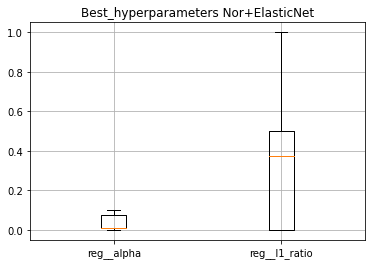

Modes=  [0.01 0.  ]


<Figure size 432x288 with 0 Axes>

In [87]:
from scipy.stats import mode
from datetime import date

r = 1 #hyperparameters model 1
nh = len(best_hyperpar[0][r])
hyperpar_r = np.zeros((Niter,nh)) 
for i in range(Niter):
  for j in range(nh):
    hyperpar_r[i,j] = best_hyperpar[i][r].get(list(best_hyperpar[i][r].keys())[j])
    
    
#revisar numero entero para realizar casting
aa = list(best_hyperpar[0][r].keys())
c = -1
for i in range(len(aa)):
    if aa[i].find('n_neighbors') > -1:
      c = i

plt.boxplot(hyperpar_r)
plt.xticks(ticks=np.arange(nh)+1,labels=list(best_hyperpar[0][r].keys()))
plt.title('Best_hyperparameters '+label_model[r])
plt.grid()
plt.show()

mode_hyper = mode(hyperpar_r,axis=0)[0][0]
print("Modes= ", mode_hyper)
plt.savefig('results/hyperpar.pdf', format='pdf', dpi=300)

# Modelo definitivo

* Con los mejores hiperparametros entreno sobre Xtrain completo el modelo final.
* se escogio ElasticNet ya que es el que ofrese mejor analisis grafico de los modelos implementados.

In [56]:

r = 1 #camino elastic net
steps_final = [('scaler',StandardScaler()),
               ('reg',ElasticNet(alpha=0.01,l1_ratio=0))]  
         
modelo_final = Pipeline(steps_final)
modelo_final.fit(Xtrain,ytrain)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('reg',
                 ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True,
                            l1_ratio=0, max_iter=1000, normalize=False,
                            positive=False, precompute=False, random_state=None,
                            selection='cyclic', tol=0.0001,
                            warm_start=False))],
         verbose=False)

In [57]:
ytest_e = modelo_final.predict(Xtest) #simular casos nuevos

In [58]:
print('MAE_test=', msa(ytest,ytest_e))

MAE_test= 0.3480927266690494


In [59]:
pathpre = 'resultados'

try:
  os.mkdir(pathpre)
except:
  print("Carpeta results ya existe")

In [60]:
import shutil
from joblib import dump, load
from datetime import date, datetime
from google.colab import files

modelo_final = {'modelo':modelo_final,
          'pasos':label_model[1],
          'mae_test':msa(ytest,ytest_e),
            } 

dump(modelo_final,'resultados/modelo_final.joblib')
namefile = str(datetime.now().strftime("%Y_%m_%d_%H_%M_%d"))+'__modelo'
shutil.make_archive(namefile, 'zip', 'resultados')
files.download(namefile+'.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


# Para evitar desconexión
Presionar Presionar la secuencia Crtl+Shift+i y copiar:

function ClickConnect(){ console.log("Working"); document.querySelector("colab-toolbar-button").click() }setInterval(ClickConnect,60000)